In [54]:
key="b4fe90ed47f647b5b95b90cf976db83f"
endpoint="https://staging-language-model.cognitiveservices.azure.com/"

In [55]:
import pandas as pd

In [ ]:
data=pd.read_csv("Reviews.csv")
data=data.head(10)
data

In [ ]:
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

In [5]:
client=TextAnalyticsClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(key)
)

In [8]:
def Analyse_Summary(summary):
    summary_sentiment=client.analyze_sentiment(summary)
    sent_res=[]
    for i in summary_sentiment:
        sent_res.append(i.sentiment)
    return sent_res



In [9]:
lis=list(data['Summary'])

In [10]:
print(lis)

['Good Quality Dog Food', 'Not as Advertised', '"Delight" says it all', 'Cough Medicine', 'Great taffy', 'Nice Taffy', 'Great!  Just as good as the expensive brands!', 'Wonderful, tasty taffy', 'Yay Barley', 'Healthy Dog Food']


In [53]:
sentiment=Analyse_Summary(lis)

ClientAuthenticationError: (401) Access denied due to invalid subscription key or wrong API endpoint. Make sure to provide a valid key for an active subscription and use a correct regional API endpoint for your resource.
Code: 401
Message: Access denied due to invalid subscription key or wrong API endpoint. Make sure to provide a valid key for an active subscription and use a correct regional API endpoint for your resource.

In [21]:
def key_phrase(Text):
    key_res=[]
    summary_keyphrase=client.extract_key_phrases(Text)
    for i in summary_keyphrase:
        key_res.append(i.key_phrases)
    return key_res

In [22]:
lis1=data['Text'].to_list()

In [23]:
print(key_phrase(lis1))

[['Vitality canned dog food products', 'good quality', 'processed meat', 'My Labrador', 'stew'], ['Jumbo Salted Peanuts', 'Product', 'error', 'vendor'], ['light, pillowy citrus gelatin', 'C.S. Lewis', 'tiny squares', 'powdered sugar', 'tiny mouthful', 'The Lion', 'The Wardrobe', 'yummy treat', 'The Witch', 'confection', 'centuries', 'nuts', 'case', 'Filberts', 'heaven', 'story', 'Edmund', 'Brother', 'Sisters'], ['Root Beer Extract', 'secret ingredient', 'cherry soda', 'Robitussin', 'addition', 'flavor'], ['Great taffy', 'great price', 'wide assortment', 'yummy taffy', 'taffy lover', 'Delivery', 'deal'], ['five pound bag', 'red/black licorice-flavored pieces', 'wild hair', 'many flavors', 'root beer', 'particular favorites', 'delightful treat', 'taffy', 'watermelon', 'peppermint', 'grape', 'complaint', 'kids', 'husband', 'two', 'brand'], ['saltwater taffy', 'great flavors', 'expensive version', 'beach-themed party', 'candy', 'None', 'candies', 'Fralinger', 'everyone'], ['taffy', 'flavor

In [40]:
def entities(Text):
    entities=[]
    ent_res=client.recognize_entities(Text[0:5])
    for i in ent_res:
        entities.append([(entity.text, entity.category, entity.subcategory) for entity in i.entities])
    return entities
        

In [41]:
for i in entities(lis1):
    print(i)

[('Vitality', 'Organization', 'Sports'), ('canned dog food products', 'Product', None), ('stew', 'Product', None), ('processed meat', 'Product', None), ('product', 'Product', None)]
[('Product', 'Product', None), ('Jumbo Salted Peanuts', 'Product', None), ('peanuts', 'Product', None), ('vendor', 'PersonType', None)]
[('confection', 'Product', None), ('gelatin', 'Product', None), ('Filberts', 'Product', None), ('powdered sugar', 'Product', None), ('heaven', 'Location', 'Structural'), ('C.S. Lewis', 'Person', None), ('Edmund', 'Person', None), ('Brother', 'PersonType', None), ('Sisters', 'PersonType', None), ('Witch', 'PersonType', None)]
[('Robitussin', 'Product', None), ('Root Beer Extract', 'Product', None), ('cherry soda', 'Product', None)]
[('taffy', 'Product', None), ('taffy', 'Product', None), ('Delivery', 'Skill', None), ('lover', 'PersonType', None)]


In [44]:
import matplotlib.pyplot as plt

In [50]:
data_lis=pd.DataFrame(lis)

(array([5., 5.]), array([0. , 4.5, 9. ]), <BarContainer object of 2 artists>)

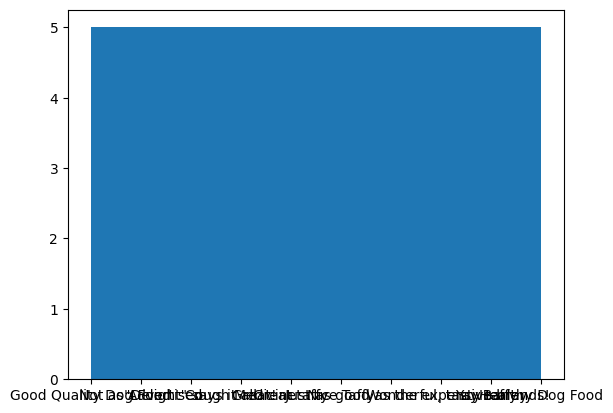

In [52]:
plt.hist(data_lis,bins=2)